In [10]:
library(tidyverse)
library(ggvenn)

In [11]:
######## load csv ######## 
Maya1_leaf <- read.csv("reference csv/Total_Maya1_leaf.csv")
Maya2_leaf <- read.csv("Total/Total_Maya2_leaf.csv")

######## make total table ########
colnames(Maya1_leaf)
colnames(Maya2_leaf)

TOTAL <- Maya1_leaf %>%
  dplyr::select("Gene", "Gene_Symbol", "Gene_Name", "Log2FC_WT", "Padj_WT", "Log2FC_fls2", "Padj_fls2") %>%
  dplyr::mutate(Maya2_leaf$Log2FC_WT, Maya2_leaf$Padj_WT, Maya2_leaf$Log2FC_fls2, Maya2_leaf$Padj_fls2) %>%
  dplyr::mutate(Maya1_leaf$GO)

colnames(TOTAL)

colnames(TOTAL) <- c("Gene", "Gene_Symbol", "Gene_Name", 
                     "Log2FC_WT_Maya1_leaf", "Padj_WT_Maya1_leaf", "Log2FC_fls2_Maya1_leaf", "Padj_fls2_Maya1_leaf", 
                     "Log2FC_WT_Maya2_leaf", "Padj_WT_Maya2_leaf", "Log2FC_fls2_Maya2_leaf", "Padj_fls2_Maya2_leaf",
                     "GO")
colnames(TOTAL)

[1] "X"               "Gene"            "Gene_Symbol"     "Gene_Name"      
 [5] "Log2FC_WT"       "Padj_WT"         "Log2FC_fls2"     "Padj_fls2"      
 [9] "DMSO_WT_rep1"    "DMSO_WT_rep2"    "DMSO_WT_rep3"    "Maya1_WT_rep1"  
[13] "Maya1_WT_rep2"   "Maya1_WT_rep3"   "DMSO_fls2_rep1"  "DMSO_fls2_rep2" 
[17] "DMSO_fls2_rep3"  "Maya1_fls2_rep1" "Maya1_fls2_rep2" "Maya1_fls2_rep3"
[21] "GO"

[1] "X"               "Gene"            "Gene_Symbol"     "Gene_Name"      
 [5] "Log2FC_WT"       "Padj_WT"         "Log2FC_fls2"     "Padj_fls2"      
 [9] "DMSO_WT_rep1"    "DMSO_WT_rep2"    "DMSO_WT_rep3"    "Maya2_WT_rep1"  
[13] "Maya2_WT_rep2"   "Maya2_WT_rep3"   "DMSO_fls2_rep1"  "DMSO_fls2_rep2" 
[17] "DMSO_fls2_rep3"  "Maya2_fls2_rep1" "Maya2_fls2_rep2" "Maya2_fls2_rep3"
[21] "GO"

[1] "Gene"                   "Gene_Symbol"            "Gene_Name"             
 [4] "Log2FC_WT"              "Padj_WT"                "Log2FC_fls2"           
 [7] "Padj_fls2"              "Maya2_leaf$Log2FC_WT"   "Maya2_leaf$Padj_WT"    
[10] "Maya2_leaf$Log2FC_fls2" "Maya2_leaf$Padj_fls2"   "Maya1_leaf$GO"

[1] "Gene"                   "Gene_Symbol"            "Gene_Name"             
 [4] "Log2FC_WT_Maya1_leaf"   "Padj_WT_Maya1_leaf"     "Log2FC_fls2_Maya1_leaf"
 [7] "Padj_fls2_Maya1_leaf"   "Log2FC_WT_Maya2_leaf"   "Padj_WT_Maya2_leaf"    
[10] "Log2FC_fls2_Maya2_leaf" "Padj_fls2_Maya2_leaf"   "GO"

In [12]:
######## filtering step ######## 
Maya1_WT_leaf_UP <- TOTAL %>%
  dplyr::filter(Log2FC_WT_Maya1_leaf > 1, Padj_WT_Maya1_leaf < 0.1)
Maya1_fls2_leaf_UP <- TOTAL %>%
  dplyr::filter(Log2FC_fls2_Maya1_leaf > 1, Padj_fls2_Maya1_leaf < 0.1)
Maya1_WT_leaf_UP_FLS2_Dep <- Maya1_WT_leaf_UP %>%
  dplyr::filter(!(Gene %in% Maya1_fls2_leaf_UP$Gene))

Maya2_WT_leaf_UP <- TOTAL %>%
  dplyr::filter(Log2FC_WT_Maya2_leaf > 1, Padj_WT_Maya2_leaf < 0.1)
Maya2_fls2_leaf_UP <- TOTAL %>%
  dplyr::filter(Log2FC_fls2_Maya2_leaf > 1, Padj_fls2_Maya2_leaf < 0.1)
Maya2_WT_leaf_UP_FLS2_Dep <- Maya2_WT_leaf_UP %>%
  dplyr::filter(!(Gene %in% Maya2_fls2_leaf_UP$Gene))

Maya1_WT_leaf_DOWN <- TOTAL %>%
  dplyr::filter(Log2FC_WT_Maya1_leaf < -1, Padj_WT_Maya1_leaf < 0.1)
Maya1_fls2_leaf_DOWN <- TOTAL %>%
  dplyr::filter(Log2FC_fls2_Maya1_leaf < -1, Padj_fls2_Maya1_leaf < 0.1)
Maya1_WT_leaf_DOWN_FLS2_Dep <- Maya1_WT_leaf_DOWN %>%
  dplyr::filter(!(Gene %in% Maya1_fls2_leaf_DOWN$Gene))

Maya2_WT_leaf_DOWN <- TOTAL %>%
  dplyr::filter(Log2FC_WT_Maya2_leaf < -1, Padj_WT_Maya2_leaf < 0.1)
Maya2_fls2_leaf_DOWN <- TOTAL %>%
  dplyr::filter(Log2FC_fls2_Maya2_leaf < -1, Padj_fls2_Maya2_leaf < 0.1)
Maya2_WT_leaf_DOWN_FLS2_Dep <- Maya2_WT_leaf_DOWN %>%
  dplyr::filter(!(Gene %in% Maya2_fls2_leaf_DOWN$Gene))

######## list-up for venn diagram ######## 

vennlistUp <- list("Maya1_leaf_UP_only_WT" = Maya1_WT_leaf_UP_FLS2_Dep$Gene,
                  "Maya1_leaf_DOWN_only_WT" = Maya1_WT_leaf_DOWN_FLS2_Dep$Gene,
                  "Maya2_leaf_UP_only_WT" = Maya2_WT_leaf_UP_FLS2_Dep$Gene,
                  "Maya2_leaf_DOWN_only_WT" = Maya2_WT_leaf_DOWN_FLS2_Dep$Gene)
vennlistUp <- lapply(vennlistUp, function(x) x[!is.na(x)])

####### list-up for total up and down gene ######## 

UP_list <- append(vennlistUp$Maya1_leaf_UP_only_WT, vennlistUp$Maya2_leaf_UP_only_WT)
length(UP_list)
UP_list<-unique(UP_list)
length(UP_list)

DOWN_list <- append(vennlistUp$Maya1_leaf_DOWN_only_WT, vennlistUp$Maya2_leaf_DOWN_only_WT)
length(DOWN_list)
DOWN_list <- unique(DOWN_list)
length(DOWN_list)


[1] 619

[1] 601

[1] 529

[1] 520

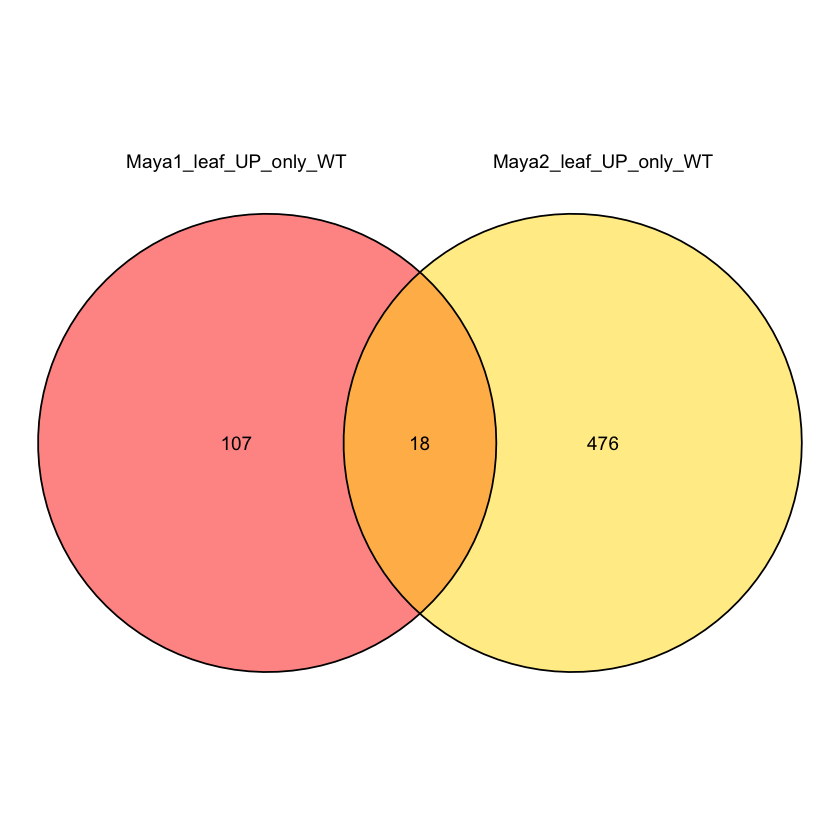

In [6]:
######## draw Venn diagram ########
ggvenn(vennlistUp, c("Maya1_leaf_UP_only_WT", "Maya2_leaf_UP_only_WT"),
       fill_color = c("#ff2800", "#ffda00", "#ffae42"),
       stroke_size = 0.5, set_name_size = 4, show_percentage = FALSE)

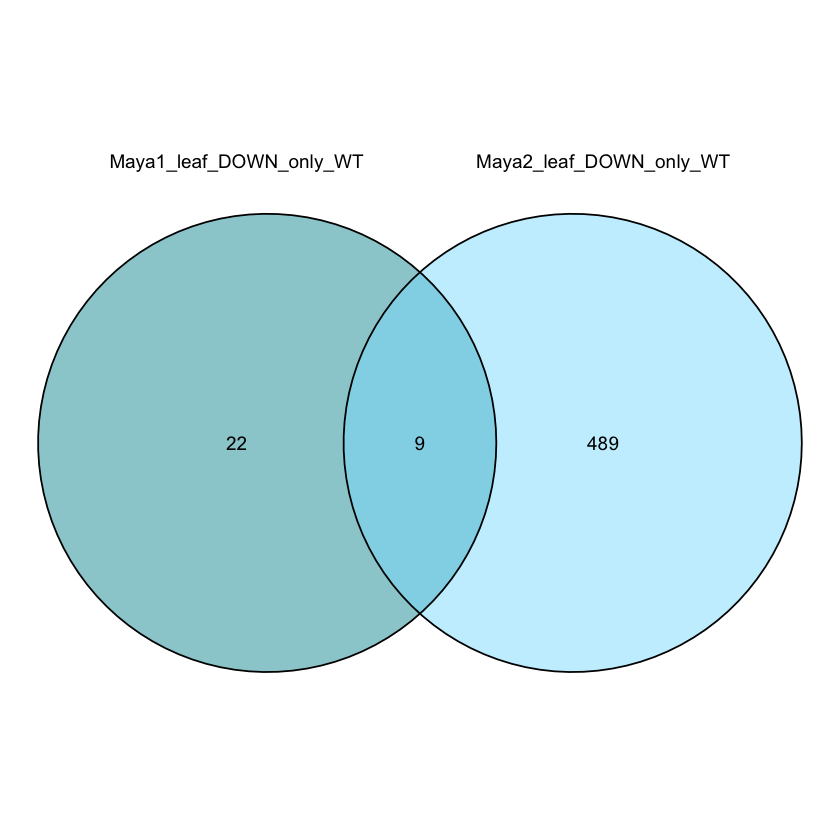

In [7]:
ggvenn(vennlistUp, c("Maya1_leaf_DOWN_only_WT", "Maya2_leaf_DOWN_only_WT"),
       fill_color = c("#0d9ba3", "#8ae0fe", "#4eabae"),
       stroke_size = 0.5, set_name_size = 4, show_percentage = FALSE)

In [13]:
######### Export csv #########
# UP gene list up
Both_UP_list <- intersect(vennlistUp$Maya1_leaf_UP_only_WT, vennlistUp$Maya2_leaf_UP_only_WT)
Left_UP_list <- setdiff(vennlistUp$Maya1_leaf_UP_only_WT, vennlistUp$Maya2_leaf_UP_only_WT)
Right_UP_list <- setdiff(vennlistUp$Maya2_leaf_UP_only_WT, vennlistUp$Maya1_leaf_UP_only_WT)

# DOWN gene list up
Both_DOWN_list <- intersect(vennlistUp$Maya1_leaf_DOWN_only_WT, vennlistUp$Maya2_leaf_DOWN_only_WT)
Left_DOWN_list <- setdiff(vennlistUp$Maya1_leaf_DOWN_only_WT, vennlistUp$Maya2_leaf_DOWN_only_WT)
Right_DOWN_list <- setdiff(vennlistUp$Maya2_leaf_DOWN_only_WT, vennlistUp$Maya1_leaf_DOWN_only_WT)

######### filter TOTAL by list #########
Both_UP <- TOTAL %>%
  dplyr::filter(Gene %in% Both_UP_list)
nrow(Both_UP)
Left_UP <- TOTAL %>%
  dplyr::filter(Gene %in% Left_UP_list)
nrow(Left_UP)
Right_UP <- TOTAL %>%
  dplyr::filter(Gene %in% Right_UP_list)
nrow(Right_UP)

Both_DOWN <- TOTAL %>%
  dplyr::filter(Gene %in% Both_DOWN_list)
nrow(Both_DOWN)
Left_DOWN <- TOTAL %>%
  dplyr::filter(Gene %in% Left_DOWN_list)
nrow(Left_DOWN)
Right_DOWN <- TOTAL %>%
  dplyr::filter(Gene %in% Right_DOWN_list)
nrow(Right_DOWN)

[1] 18

[1] 107

[1] 476

[1] 9

[1] 22

[1] 489

In [14]:
######### write csv #########
write.csv(Both_UP,"Venn/03.Maya1L_vs_Maya2L/Both_UP.csv")
write.csv(Left_UP,"Venn/03.Maya1L_vs_Maya2L/Maya1L_only_UP.csv")
write.csv(Right_UP,"Venn/03.Maya1L_vs_Maya2L/Maya2L_only_UP.csv")
write.csv(Both_DOWN,"Venn/03.Maya1L_vs_Maya2L/Both_DOWN.csv")
write.csv(Left_DOWN,"Venn/03.Maya1L_vs_Maya2L/Maya1L_only_DOWN.csv.csv")
write.csv(Right_DOWN,"Venn/03.Maya1L_vs_Maya2L/Maya2L_only_DOWN.csv.csv")